# **Single Cell RNA-Seq Analysis**

## NETLAB Demonstration Pipeline


#### Download the data

In [ ]:
%%time
# SPaRTAN scRNA-seq
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/015/SRR14243915/SRR14243915_1.fastq.gz
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/015/SRR14243915/SRR14243915_2.fastq.gz
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/017/SRR14243917/SRR14243917_1.fastq.gz
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/017/SRR14243917/SRR14243917_2.fastq.gz

CPU times: user 17 s, sys: 2.33 s, total: 19.3 s
Wall time: 37min 4s


In [ ]:
%%time
# SPaRTAN CITE-Seq
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/016/SRR14243916/SRR14243916_1.fastq.gz
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/016/SRR14243916/SRR14243916_2.fastq.gz
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/018/SRR14243918/SRR14243918_1.fastq.gz
!wget -q ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR142/018/SRR14243918/SRR14243918_2.fastq.gz

CPU times: user 2.6 s, sys: 383 ms, total: 2.99 s
Wall time: 5min 22s


#### Install wrapper for the kallisto and bustools program,and the kb-python package

In [ ]:
%%time
!pip install --quiet kb-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 69.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 80.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 32.9 MB/s eta 0:

## CITE-Seq alignment

In [ ]:
!wget -q http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_1k_protein_v3/pbmc_1k_protein_v3_feature_ref.csv

In [ ]:
import pandas as pd
df = pd.read_csv('pbmc_1k_protein_v3_feature_ref.csv')
df[['sequence', 'id']].to_csv('features.tsv', index=None, header=None, sep='\t')
!cat features.tsv

AACAAGACCCTTGAG	CD3
TACCCGTAATAGCGT	CD4
ATTGGCACTCAGATG	CD8a
GAAAGTCAAAGCACT	CD14
ACGAATCAATCTGTG	CD15
GTCTTTGTCAGTGCA	CD16
GTTGTCCGACAATAC	CD56
TCAACGCTTGGCTAG	CD19
GTGCATTCAACAGTA	CD25
GATGAGAACAGGTTT	CD45RA
TGCATGTCATCGGTG	CD45RO
AAGTCGTGAGGCATG	PD-1
TGAAGGCTCATTTGT	TIGIT
ACATTGACGCAACTA	CD127
CTCTATTCAGACCAG	IgG2a
ACTCACTGGAGTCTC	IgG1
ATCACATCGTTGCCA	IgG2b


In [ ]:
!kb ref -i mismatch.idx -f1 mismatch.fa -g t2g.txt --workflow kite features.tsv

[2023-01-30 11:55:35,349]    INFO [ref_kite] Generating mismatch FASTA at mismatch.fa
[2023-01-30 11:55:35,357]    INFO [ref_kite] Creating transcript-to-gene mapping at t2g.txt
[2023-01-30 11:55:35,360]    INFO [ref_kite] Indexing mismatch.fa to mismatch.idx


In [ ]:
%%time
!kb count --h5ad -i mismatch.idx -g t2g.txt -x 10xv3 --workflow kite -t 2 -o /content/CITESeq \
/content/drive/MyDrive/scRNASeq/CITESeq/SRR14243916_1.fastq.gz /content/drive/MyDrive/scRNASeq/CITESeq/SRR14243916_2.fastq.gz

[2023-01-30 11:56:49,854]    INFO [count] Using index mismatch.idx to generate BUS file to /content/CITESeq from
[2023-01-30 11:56:49,855]    INFO [count]         /content/drive/MyDrive/scRNASeq/CITESeq/SRR14243916_1.fastq.gz
[2023-01-30 11:56:49,855]    INFO [count]         /content/drive/MyDrive/scRNASeq/CITESeq/SRR14243916_2.fastq.gz
[2023-01-30 12:02:00,299]    INFO [count] Sorting BUS file /content/CITESeq/output.bus to /content/CITESeq/tmp/output.s.bus
[2023-01-30 12:02:05,418]    INFO [count] Whitelist not provided
[2023-01-30 12:02:05,418]    INFO [count] Copying pre-packaged 10XV3 whitelist to /content/CITESeq
[2023-01-30 12:02:05,962]    INFO [count] Inspecting BUS file /content/CITESeq/tmp/output.s.bus
[2023-01-30 12:02:09,995]    INFO [count] Correcting BUS records in /content/CITESeq/tmp/output.s.bus to /content/CITESeq/tmp/output.s.c.bus with whitelist /content/CITESeq/10x_version3_whitelist.txt
[2023-01-30 12:02:19,036]    INFO [count] Sorting BUS file /content/CITESeq/t

# Post-process

In [ ]:
!pip install --quiet scanpy==1.9.1
!pip install --quiet matplotlib==3.5.2
# Import packages
import anndata
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 62.8 MB/s eta 0:00:00


# Create an anndata object

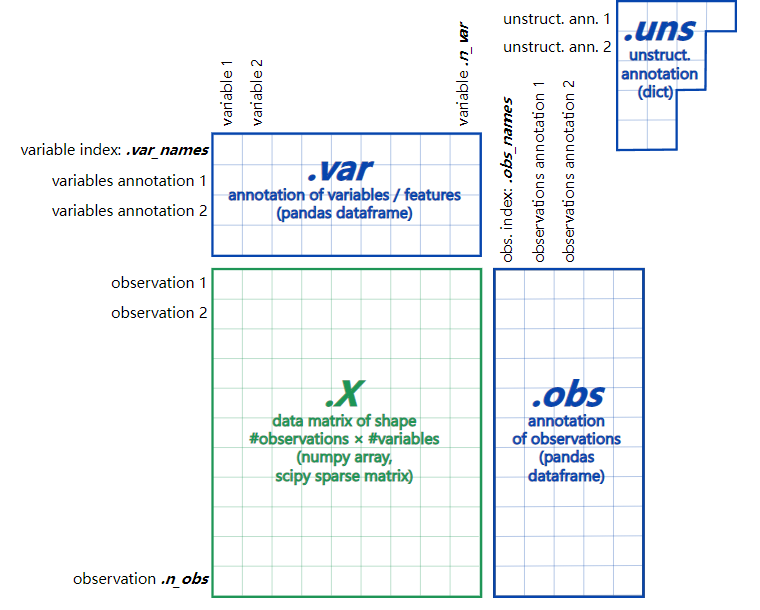

In [ ]:
# create ann data object for RNA Seq
adata = anndata.read_h5ad('/content/drive/MyDrive/scRNASeq/scRNASeq/scRNASeq_counts1/counts_unfiltered/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 64168 × 60623
    var: 'gene_name'

In [ ]:
cdata = anndata.read_h5ad('/content/drive/MyDrive/scRNASeq/CITESeq/CITESeq/counts_unfiltered/adata.h5ad')
cdata

AnnData object with n_obs × n_vars = 24828 × 17
    var: 'feature_name'

# Annotations

### Adding Gene Symbols

In [ ]:
%%time
t2g = pd.read_csv("/content/drive/MyDrive/scRNASeq/scRNASeq/t2g.txt",  delimiter="\t", header=None, usecols=[1,2], index_col=0)
my_genes = pd.read_csv("/content/drive/MyDrive/scRNASeq/scRNASeq/scRNASeq_counts1/counts_unfiltered/cells_x_genes.genes.txt",delimiter="\t", header=None)
my_genes = list(my_genes[0])
t2g = t2g.squeeze()
t2g.drop_duplicates(inplace=True)
indexes = list(t2g.index)
counter = 0
adata.var["gene_symbols"] = np.array([t2g[gene] if gene in indexes else gene for gene in my_genes])

CPU times: user 46.6 s, sys: 90 ms, total: 46.7 s
Wall time: 58.2 s


In [ ]:
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 64168 × 60623
    var: 'gene_name', 'gene_symbols'>

### Mitochondirial genes

In [ ]:
adata.var["mt"] = adata.var["gene_symbols"].str.startswith("MT-")
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 64168 × 60623
    var: 'gene_name', 'gene_symbols', 'mt'>

### Total counts per barcode

In [ ]:
total = np.array(np.sum(adata.X, axis=1)).squeeze()
adata.obs["total_counts"] = total
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 64168 × 60623
    obs: 'total_counts'
    var: 'gene_name', 'gene_symbols', 'mt'>

### Number of genes by counts




In [ ]:
%%time
n_genes_by_counts = np.array([np.count_nonzero(array.toarray(), axis = 1) for array in adata.X]).squeeze()
adata.obs["n_genes_by_counts"] = n_genes_by_counts
adata.obs_keys

CPU times: user 10 s, sys: 27.9 ms, total: 10.1 s
Wall time: 10.1 s


<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 64168 × 60623
    obs: 'total_counts', 'n_genes_by_counts'
    var: 'gene_name', 'gene_symbols', 'mt'>

### Percent mitochondrial counts


In [ ]:
mt_index = np.array(adata.var["mt"], dtype=bool)
mt_total = np.array([np.sum(array.toarray().squeeze()[mt_index]) for array in adata.X])
adata.obs["pct_counts_mt"] = 100 * mt_total / adata.obs["total_counts"]

# Plot the Metrics

In [ ]:
# Run this if there is compatibility issue in plots!
!pip install --quiet matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 72.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


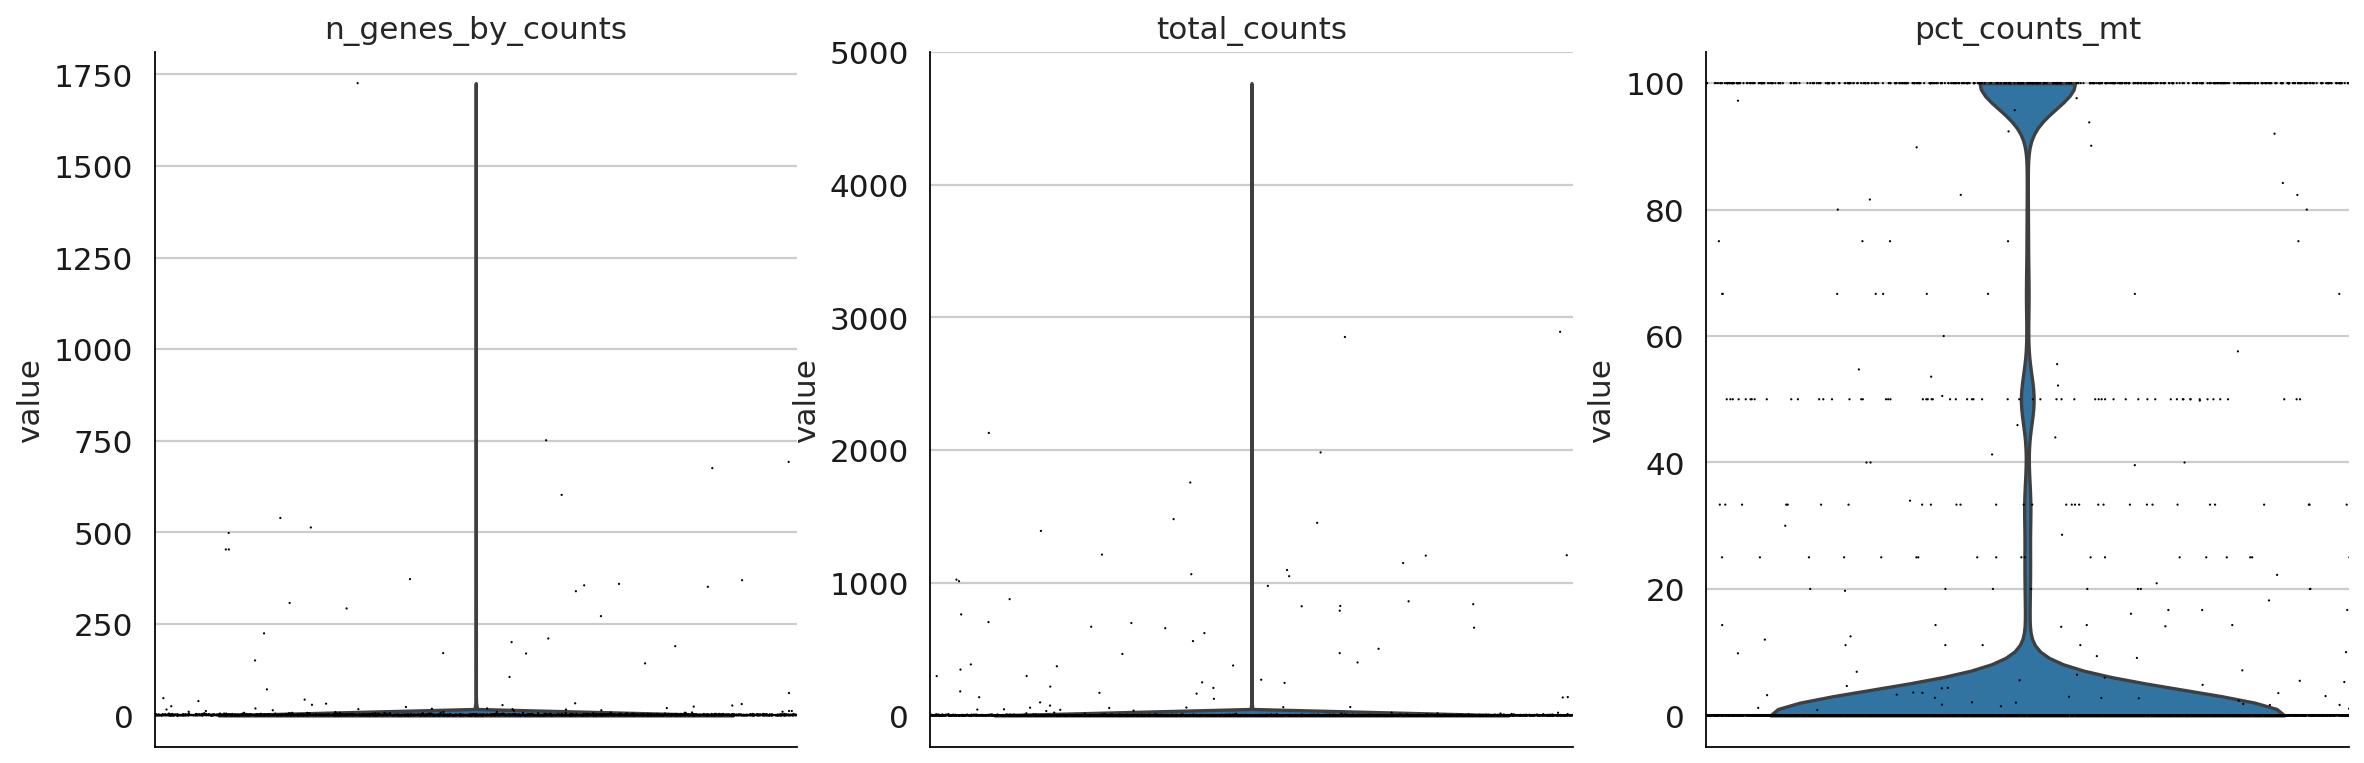

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


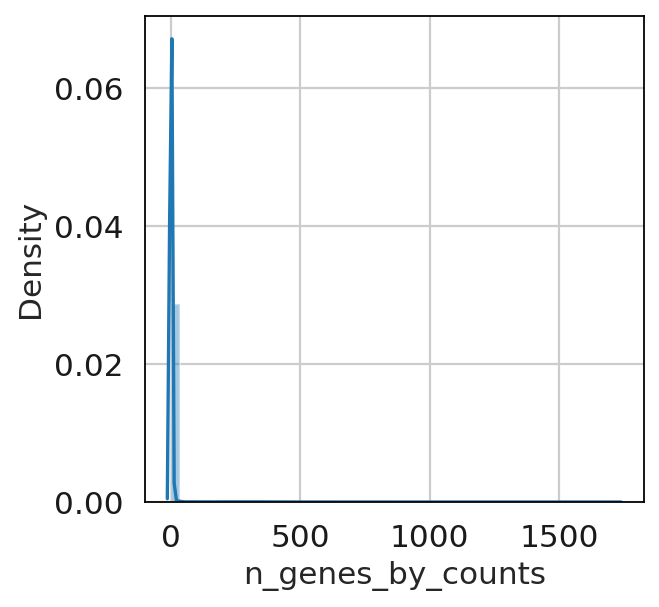

In [ ]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=8.4, multi_panel=True)
sns.distplot(adata.obs["n_genes_by_counts"])

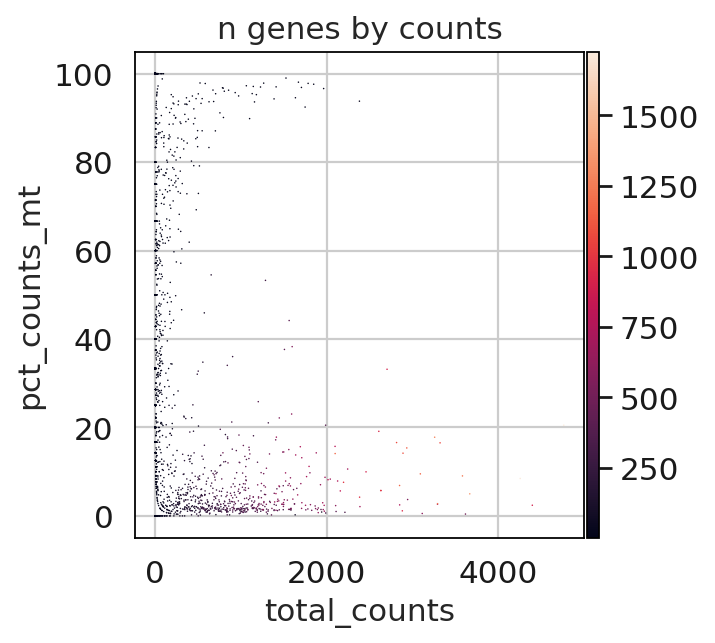

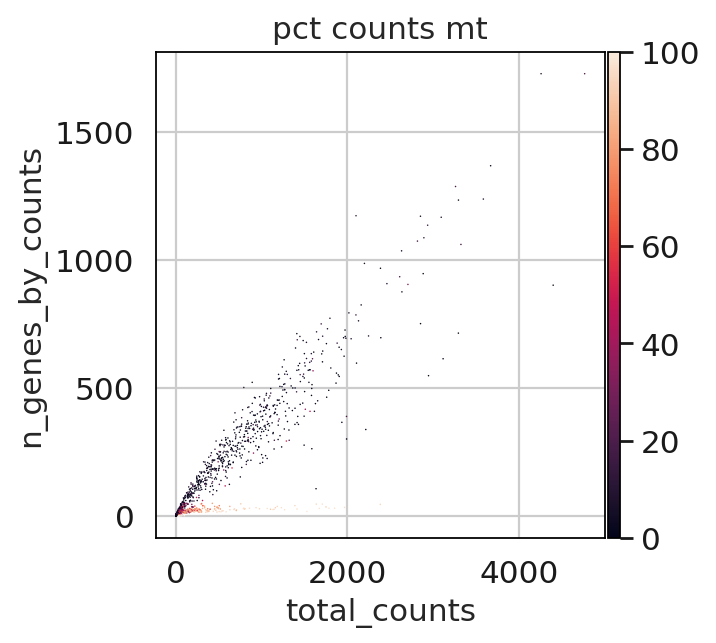

In [ ]:
# Scatter Plot of QC metrics
sc.pl.scatter(adata, x = "total_counts", y="pct_counts_mt", color = "n_genes_by_counts")
sc.pl.scatter(adata, x = "total_counts", y="n_genes_by_counts", color = "pct_counts_mt")

# Exploratory Analysis

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


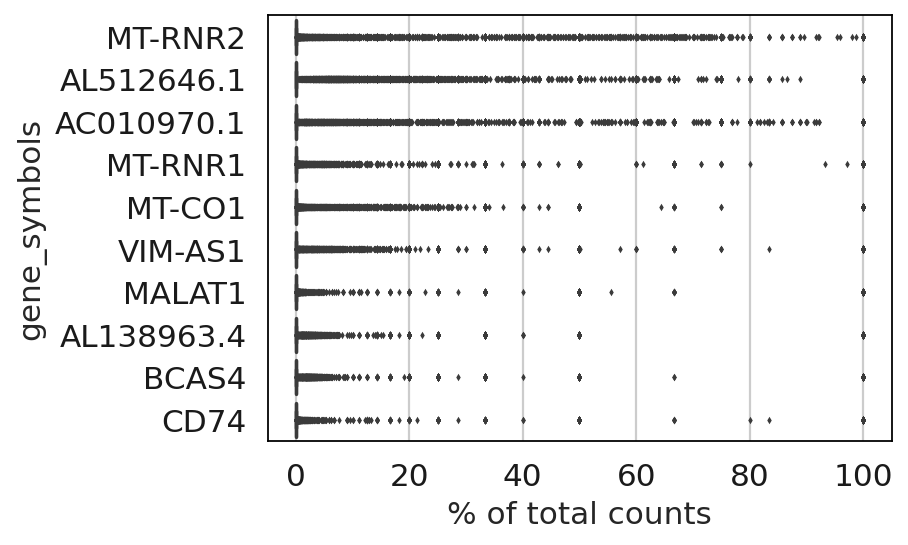

In [ ]:
# Finds genes that has highest count in the data
sc.pl.highest_expr_genes(adata, gene_symbols = "gene_symbols", n_top=10)

filtered out 63565 cells that have less than 100 genes expressed
filtered out 49101 genes that are detected in less than 3 cells
(459, 11522)


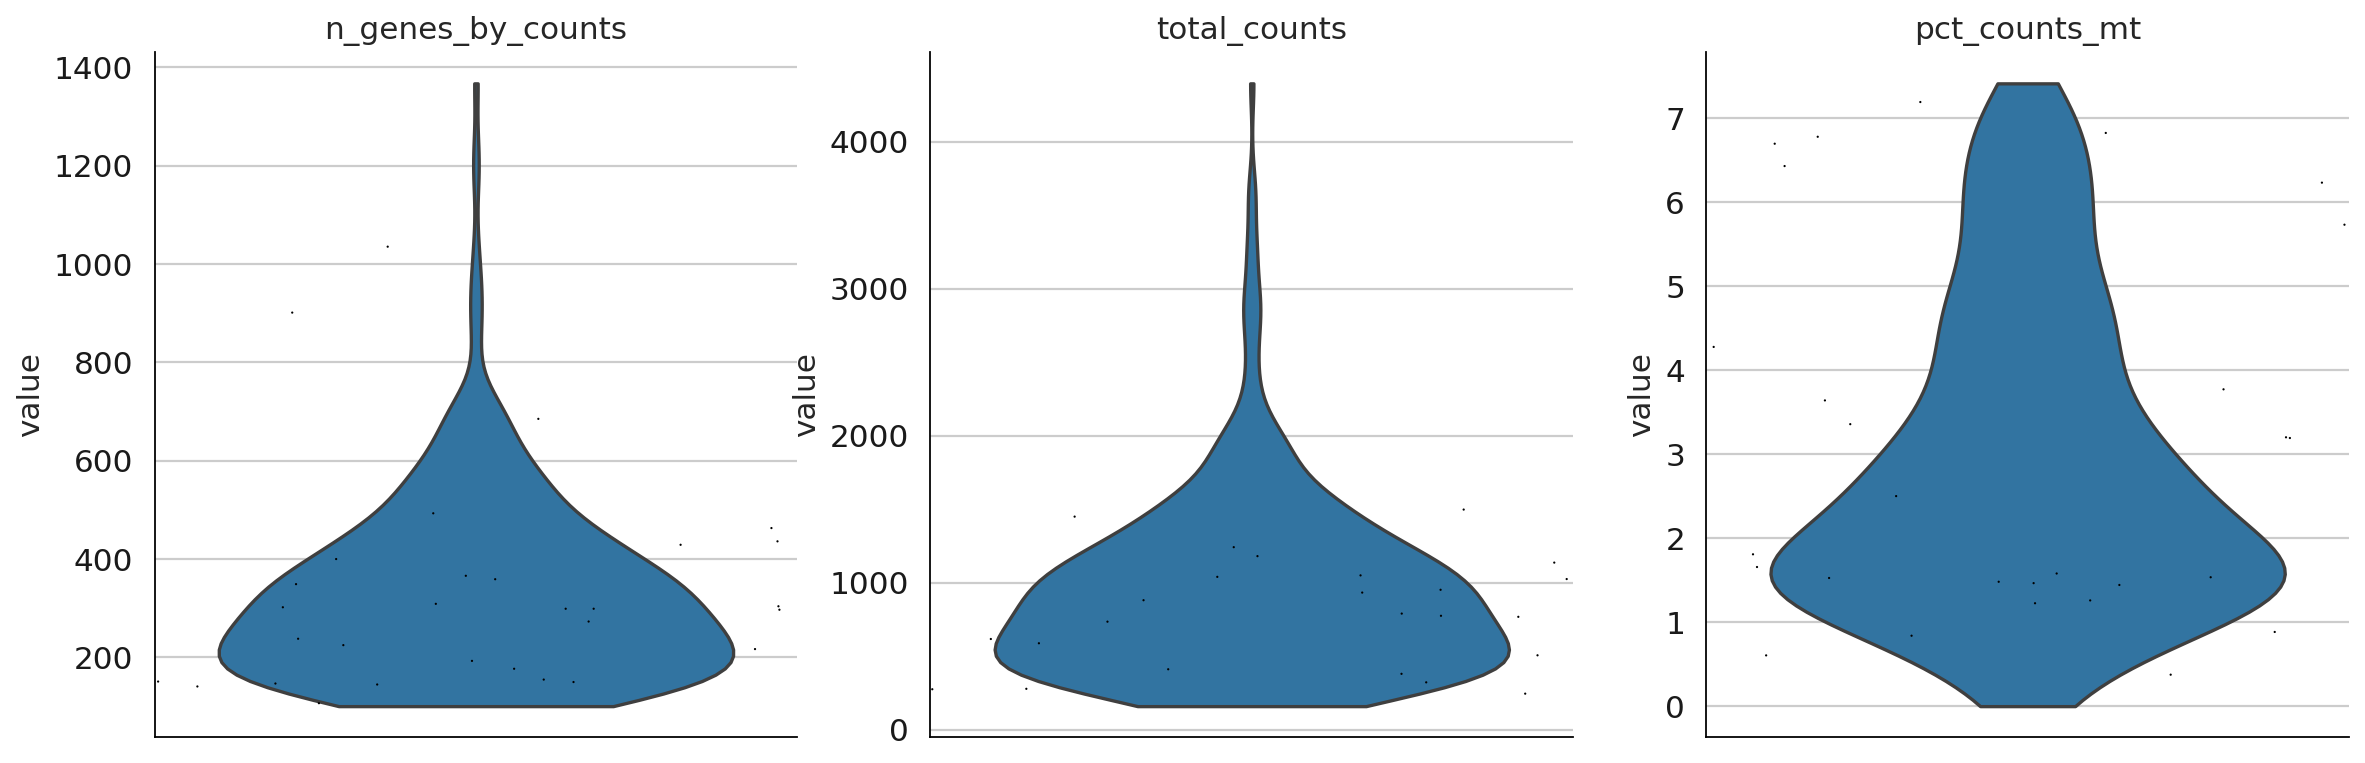

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


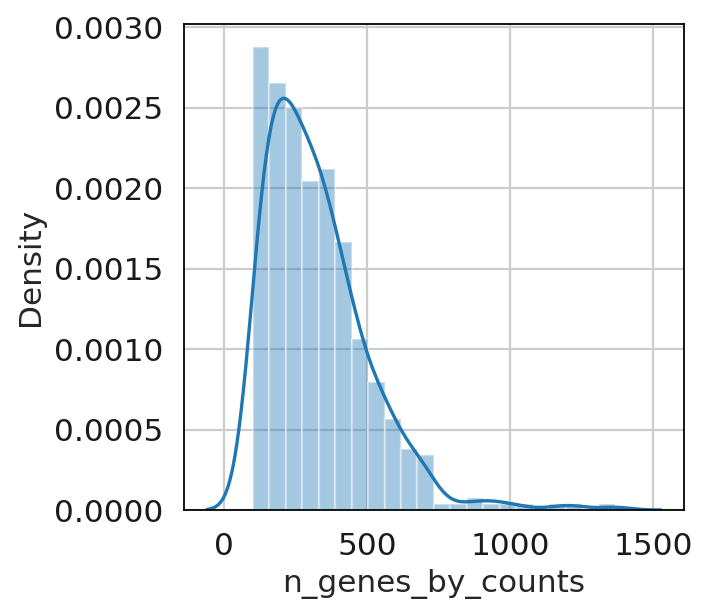

In [ ]:
# Basic Filtering (These are inplace!!!)
QC_data = adata.copy() # To keep original adata, make a copy for Quality Control
sc.pp.filter_cells(QC_data, min_genes=100) # Filter barcodes that have less than 100 genes determined
sc.pp.filter_genes(QC_data, min_cells=3) # Filter genes that are found in less than 3 cells
sc.pp.filter_cells(QC_data, max_counts=50000) # Filter cells that have more than 50,000 total counts

# Filter by slicing
QC_data = QC_data[QC_data.obs.n_genes_by_counts < 1800,:] # Select number of genes detected less than 1800
QC_data = QC_data[QC_data.obs.pct_counts_mt < 7.5,:] # Select mitochondrial gene percent is less than 7.5%

# Check new number of cells and genes remained.
print(QC_data.X.shape)
sc.pl.violin(QC_data, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=8.4, multi_panel=True)
# Histogram of QC metrics
sns.distplot(QC_data.obs["n_genes_by_counts"])

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


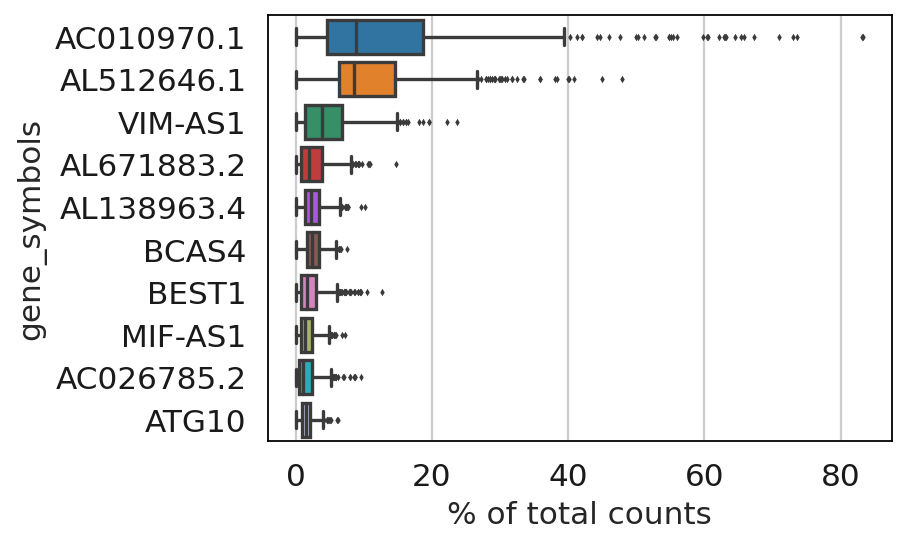

In [ ]:
sc.pl.highest_expr_genes(QC_data, gene_symbols = "gene_symbols", n_top=10)

In [ ]:
QC_data

AnnData object with n_obs × n_vars = 459 × 11522
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'gene_name', 'gene_symbols', 'mt', 'n_cells'

# CITE-Seq Quality Control

In [ ]:
total = np.array(np.sum(cdata.X, axis=1)).squeeze()
cdata.obs["total_counts"] = total
cdata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 24828 × 17
    obs: 'total_counts'
    var: 'feature_name'>

In [ ]:
%%time
n_genes_by_counts = np.array([np.count_nonzero(array.toarray(), axis = 1) for array in cdata.X]).squeeze()
cdata.obs["n_antibodies_by_counts"] = n_genes_by_counts
cdata.obs_keys

CPU times: user 1.47 s, sys: 8.82 ms, total: 1.48 s
Wall time: 1.48 s


<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 24828 × 17
    obs: 'total_counts', 'n_antibodies_by_counts'
    var: 'feature_name'>

filtered out 1 cells that have less than 1 genes expressed
(7439, 17)


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


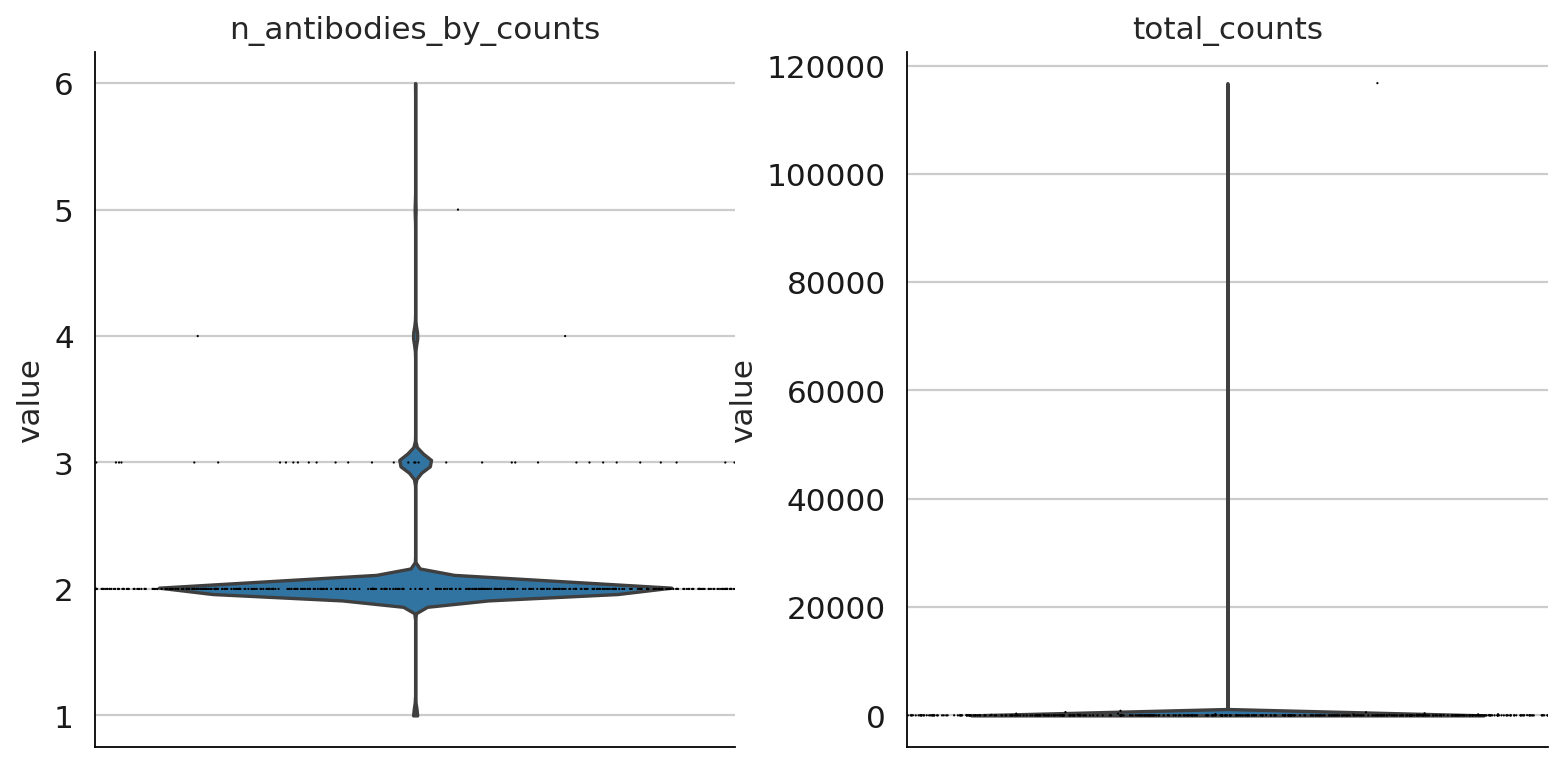

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


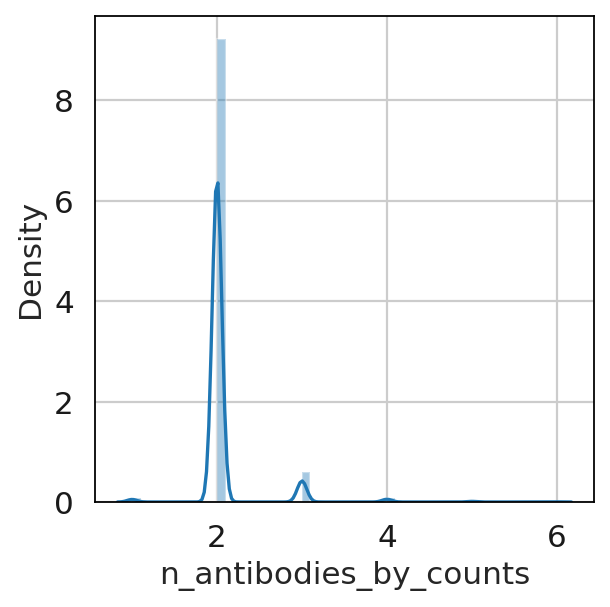

In [ ]:
# Basic Filtering (These are inplace!!!)
QC_cdata = cdata.copy() # To keep original adata, make a copy for Quality Control
sc.pp.filter_cells(QC_cdata, min_genes=1) # Filter barcodes that have less than 1 antibodies determined
sc.pp.filter_genes(QC_cdata, min_cells=1) # Filter antibodies that are found in less than 3 cells

# Filter by slicing
QC_cdata = QC_cdata[QC_cdata.obs.total_counts > 5,:] # Select barcodes haveing more than than 5 counts

# log(x+1) transform
sc.pp.log1p(QC_cdata)

# Check new number of cells and genes remained.
print(QC_cdata.X.shape)
sc.pl.violin(QC_cdata, ["n_antibodies_by_counts", "total_counts"], jitter=8.4, multi_panel=True)
# Histogram of QC metrics
sns.distplot(QC_cdata.obs["n_antibodies_by_counts"])

In [ ]:
QC_data.obs_names

Index(['AACCATGAGCGTTCCG', 'AACCATGCAGGCGATA', 'ACACTGAAGCACCGTC',
       'ACACTGAGTCAACATC', 'ACACTGATCCTCTAGC', 'ACACTGATCGGTGTTA',
       'ACAGCCGAGACAAGCC', 'ACAGCCGCACAGATTC', 'ACGGGTCAGCGCCTTG',
       'ACGGGTCAGCGTTCCG',
       ...
       'TTTATGCCAGCATACT', 'TTTATGCCATTAGGCT', 'TTTCCTCAGCTTCACG',
       'TTTCCTCAGTGCATGA', 'TTTCCTCAGTTAACGA', 'TTTCCTCCAAAGGCGT',
       'TTTCCTCCACGAGGTA', 'TTTCCTCGTATGAAAC', 'TTTCCTCGTCTTCTCG',
       'TTTGGTTTCGCCATAA'],
      dtype='object', name='barcode', length=459)

In [ ]:
QC_cdata.obs_names

Index(['AACCATGAGAAACCAT', 'AACCATGAGATCCCGC', 'AACCATGAGCCTTGAT',
       'AACCATGAGCGATTCT', 'AACCATGAGCGTCAAG', 'AACCATGAGCGTGAGT',
       'AACCATGAGCGTTCCG', 'AACCATGAGCTAGTTC', 'AACCATGAGGACTGGT',
       'AACCATGAGGCATGGT',
       ...
       'TTTGGTTTCGATCCCT', 'TTTGGTTTCGCCATAA', 'TTTGGTTTCGCGTTTC',
       'TTTGGTTTCGCTGATA', 'TTTGGTTTCGGCATCG', 'TTTGGTTTCGTGGGAA',
       'TTTGGTTTCTAAGCCA', 'TTTGGTTTCTGTCTCG', 'TTTGGTTTCTGTTGAA',
       'TTTGGTTTCTTACCGC'],
      dtype='object', name='barcode', length=7439)

In [ ]:
common_cells = list(set(QC_cdata.obs_names).intersection(set(QC_data.obs_names)))
len(common_cells)

455

In [ ]:
RNASeq = QC_data[common_cells]

In [ ]:
CITESeq = QC_cdata[common_cells]

In [ ]:
print(CITESeq.X.toarray().shape, RNASeq.X.toarray().shape)

(455, 17) (455, 11522)


# Normalization, Dimensionality Reduction, Determining HVGs


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


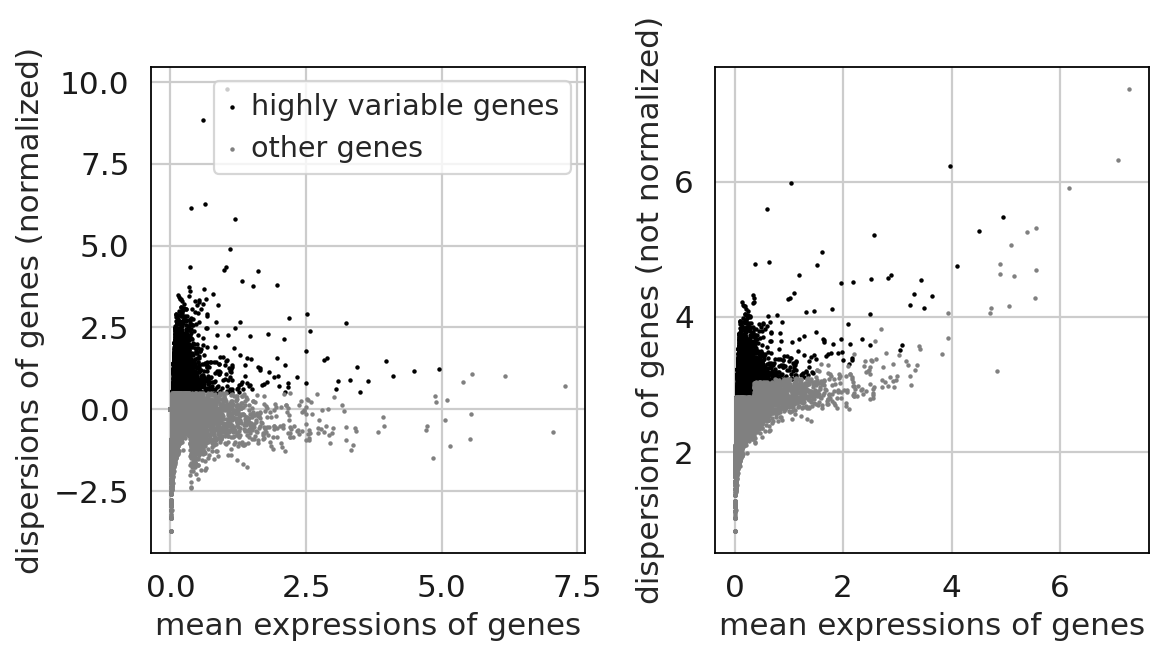

In [ ]:
# Normalize counts to 10,000 count per celll
norm_data = RNASeq.copy() # Again make a copy of QC for normalized data
sc.pp.normalize_total(norm_data, target_sum= 10000)

# log(x+1) transform
sc.pp.log1p(norm_data)

# Identify highly variable genes
# min_mean excludes zero counts which has zero means.
# max_mean excludes too variable genes which may amplified etc.
sc.pp.highly_variable_genes(norm_data, min_mean=0.0125, max_mean = 5, inplace=True)

# Plot dispersion vs expression
sc.pl.highly_variable_genes(norm_data)

In [ ]:
# Again make a copy for HVGs to keep normalized data
HVG_data = norm_data.copy() 

# Filter to only include HVGs
HVG_data.raw = HVG_data
HVG_data = HVG_data[:, HVG_data.var.highly_variable]

In [ ]:
HVG_data

View of AnnData object with n_obs × n_vars = 455 × 3288
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'gene_name', 'gene_symbols', 'mt', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

# Receptor gene coorelation 


In [ ]:
CITE_mat = CITESeq.X.toarray()
RNASeq_mat = HVG_data.X.toarray()

In [ ]:
from scipy import stats

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


0.0007669002954053688


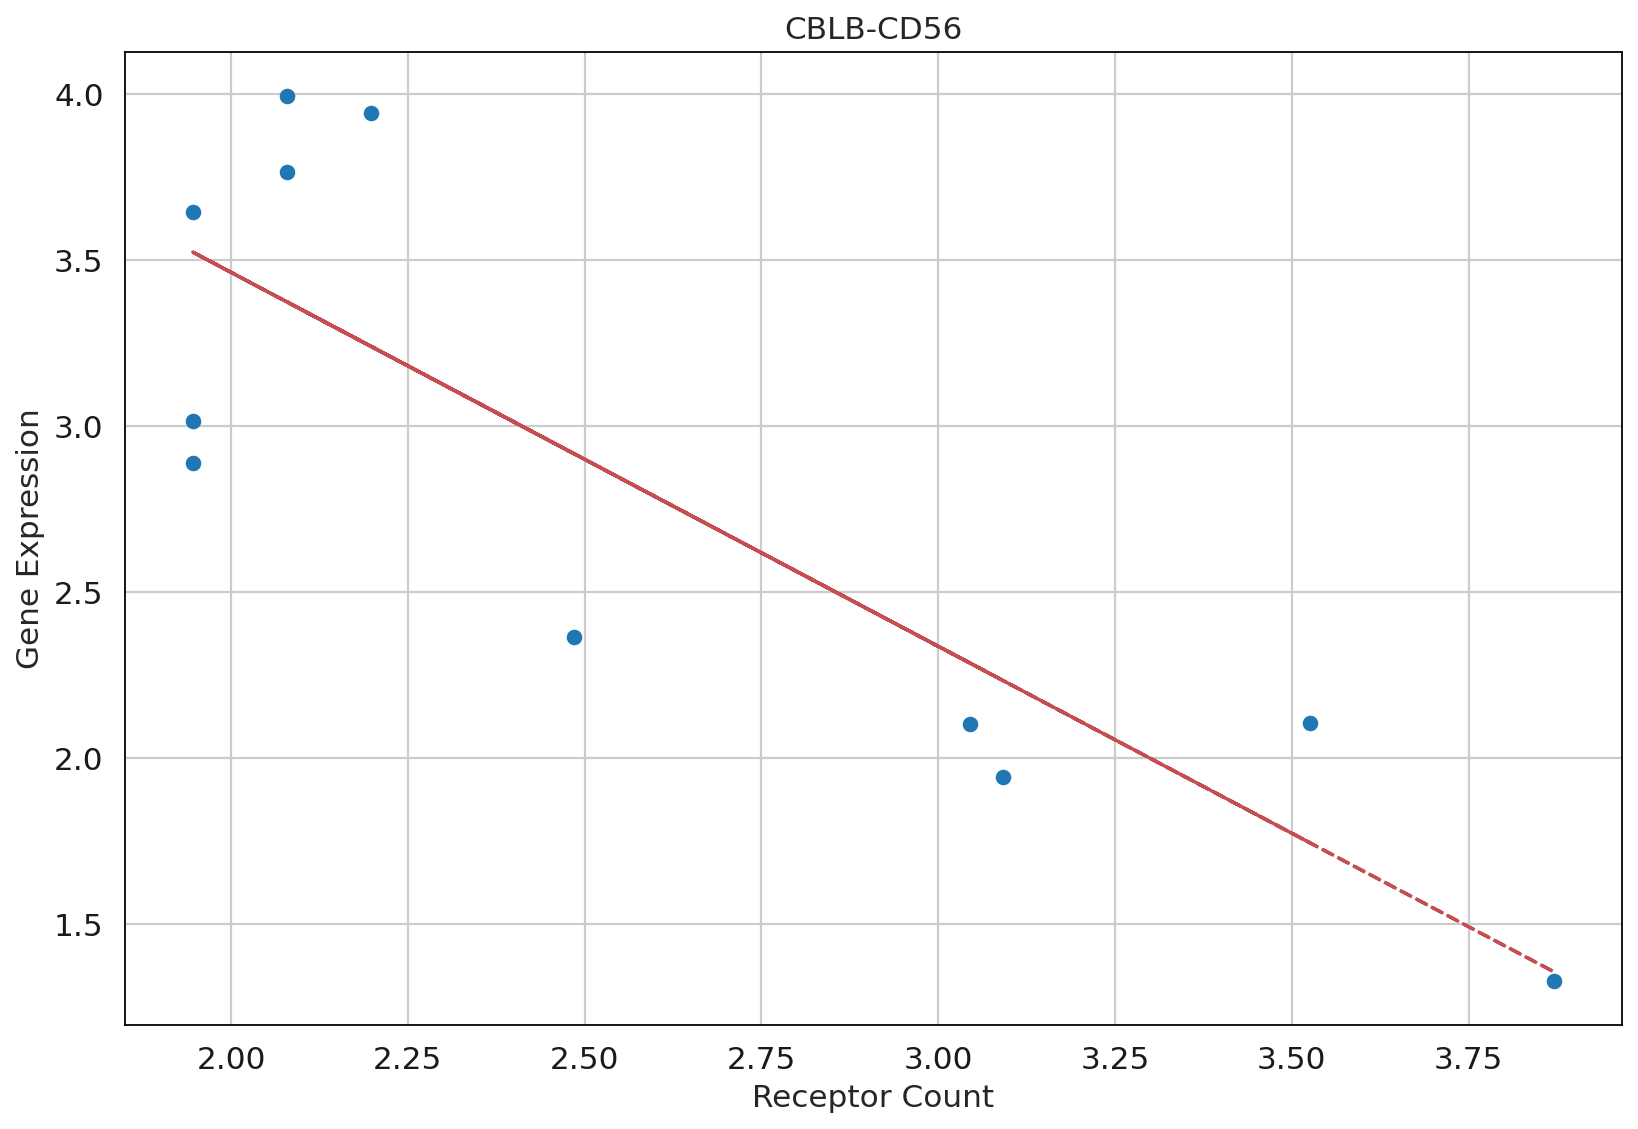

2.8464465924159546e-06


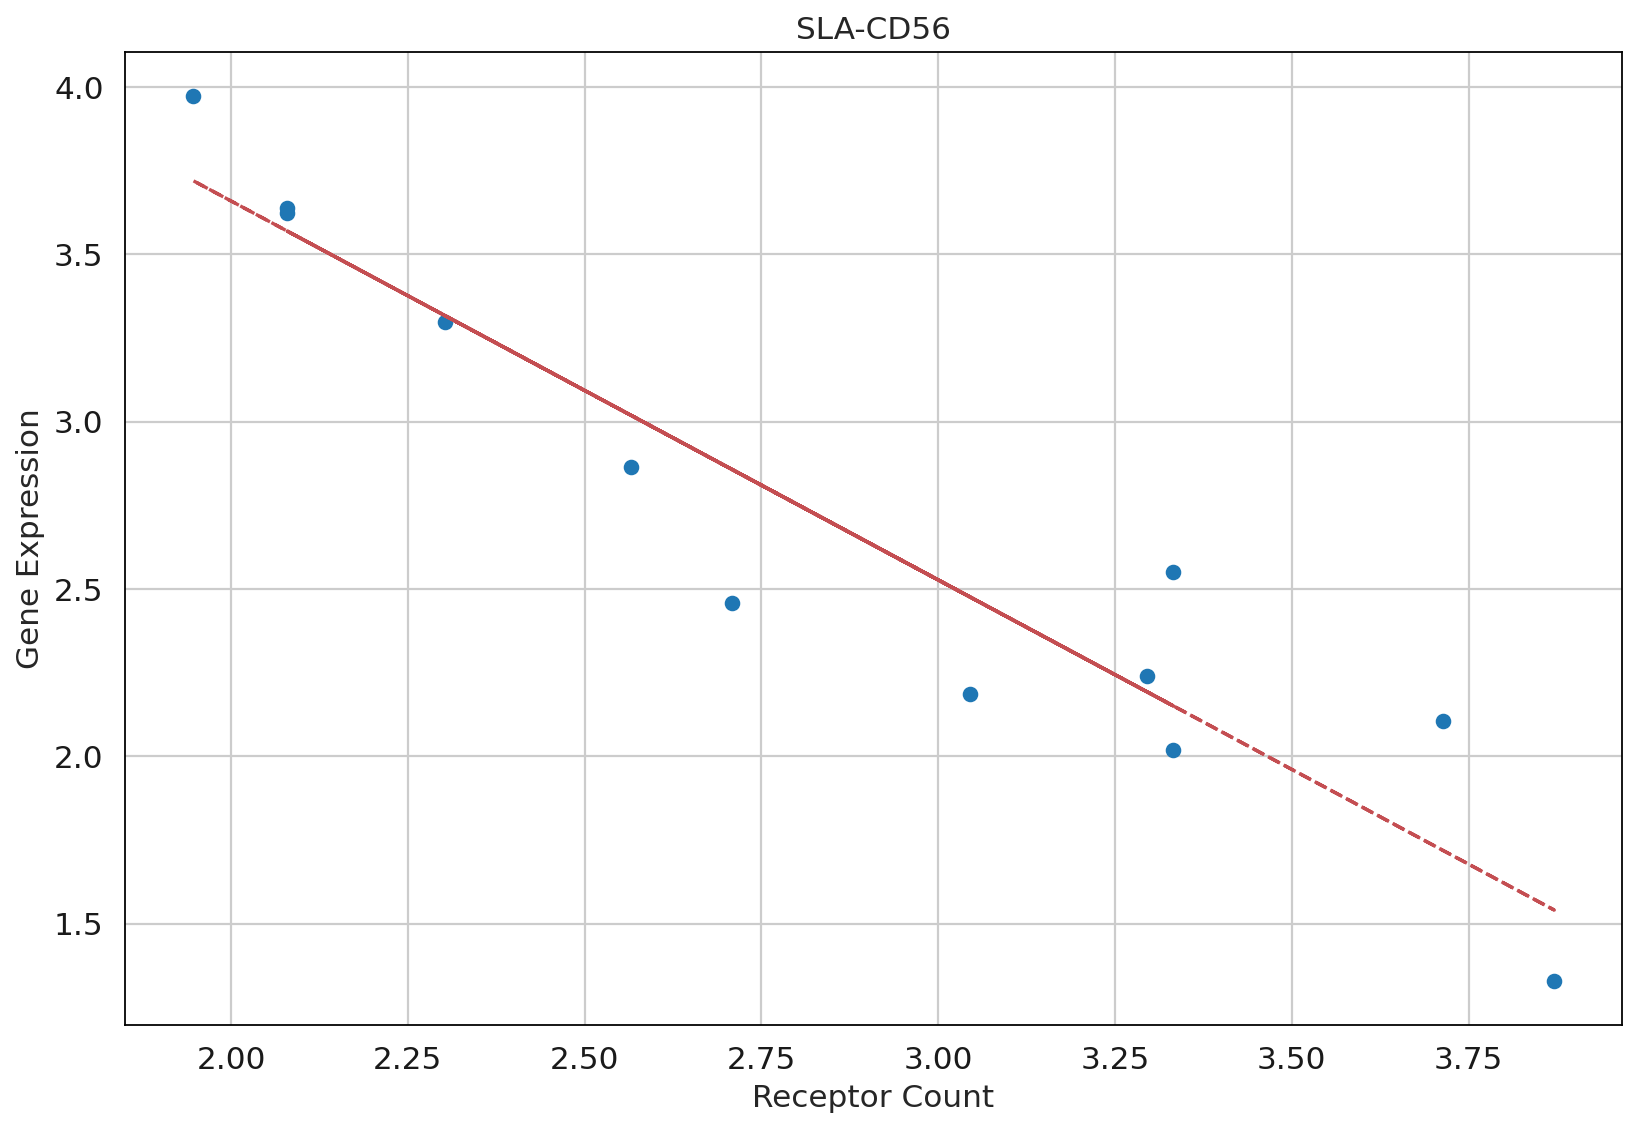

0.0006931236543601816


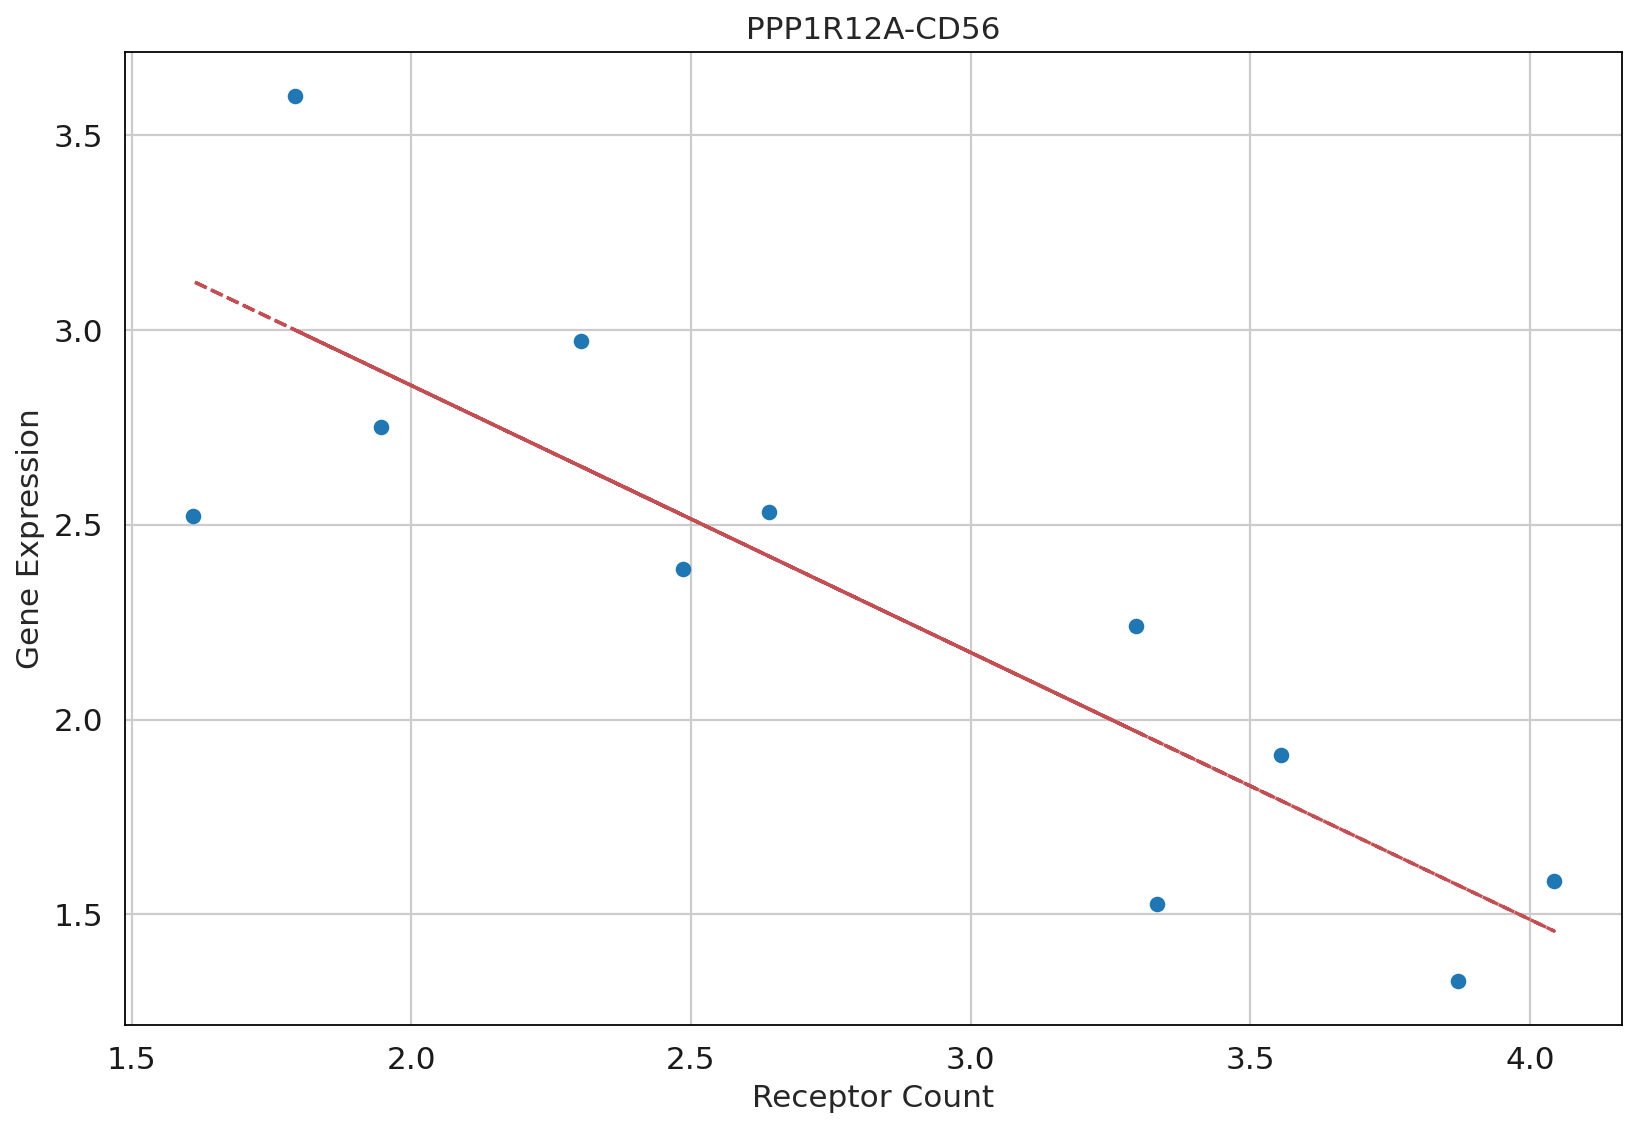

0.0007286252299398757


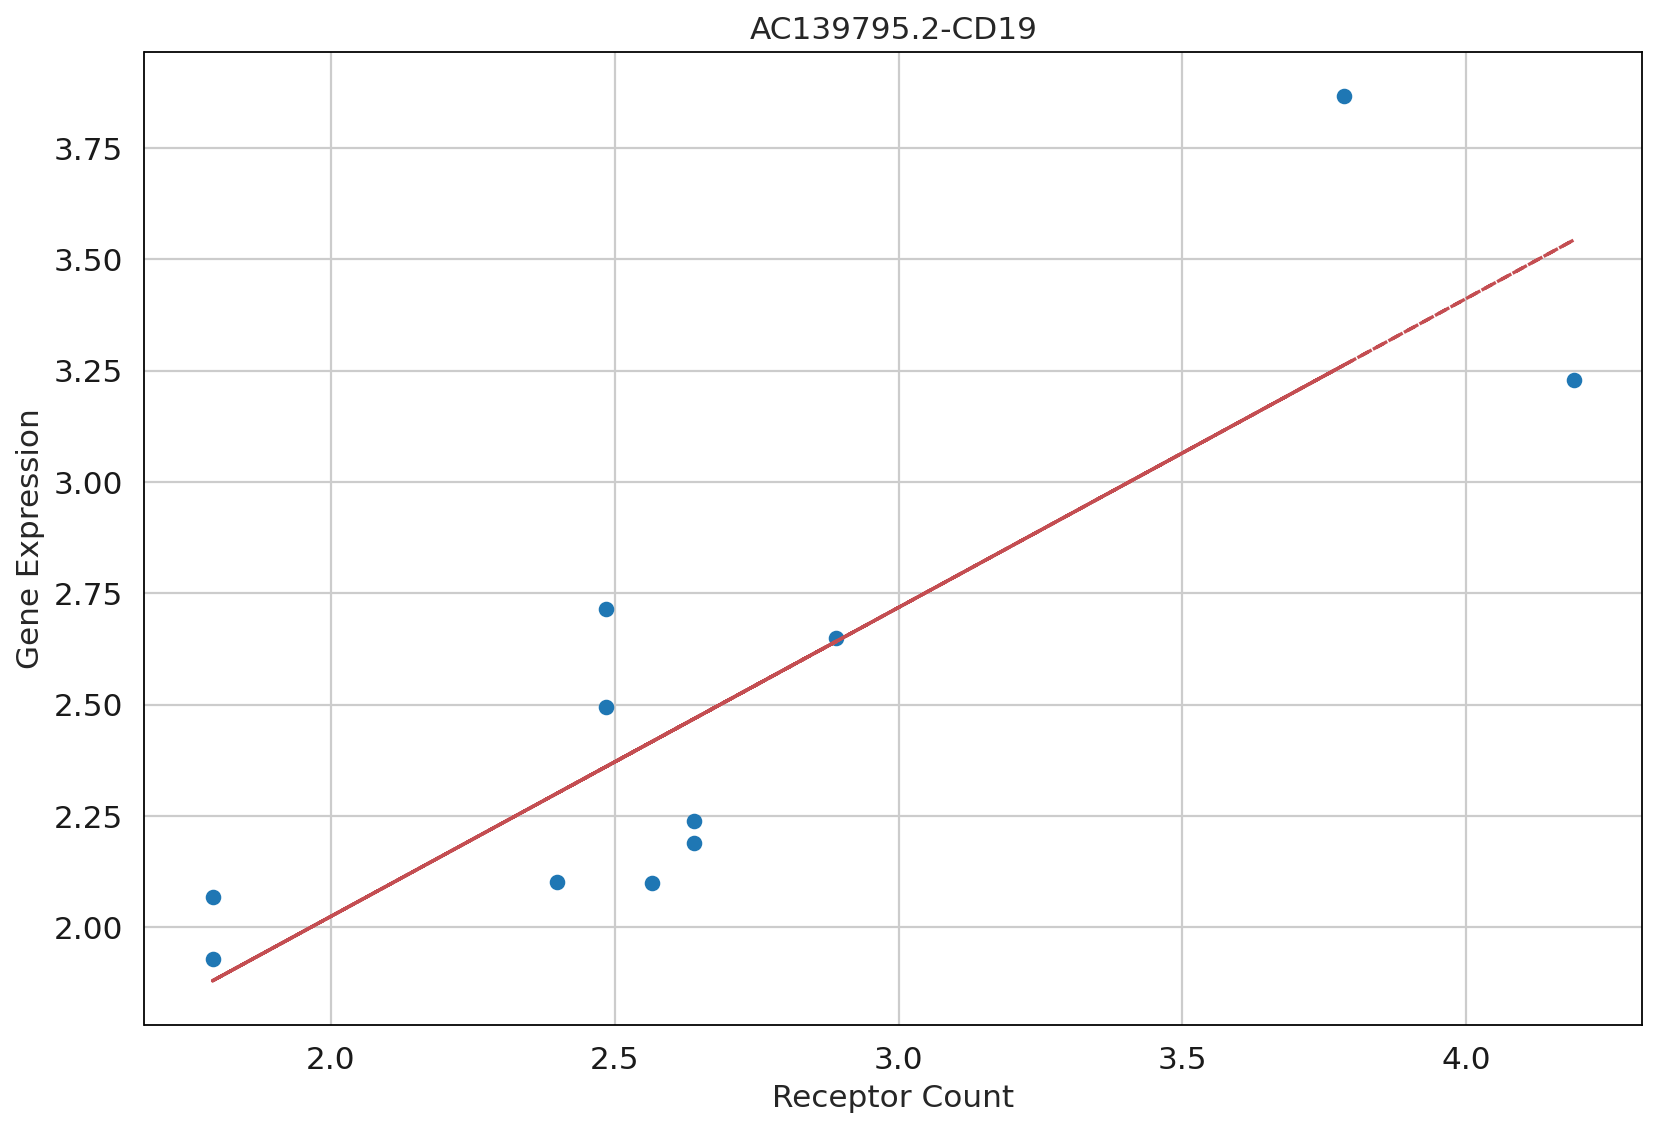

In [ ]:
for i in range(17):
  for j in range(RNASeq_mat.shape[1]):
    x = CITE_mat.T[i]
    y = RNASeq_mat.T[j]
    index = np.array([False] * len(x))
    index += (x > 0.001) & (y > 0.001)
    x = x[index]
    y = y[index]

    if len(x) > 10 and len(y) > 10:
        r, p = stats.pearsonr(x, y)
        if np.abs(r) > 0.85 and p < 0.001:
            print(p)
            m, n = np.polyfit(x, y, 1)
            plt.figure(figsize=(12,8))
            plt.scatter(x,y)
            plt.title(f"{list(HVG_data.var['gene_symbols'])[j]}-{list(CITESeq.var_names)[i]}")
            plt.xlabel("Receptor Count")
            plt.ylabel("Gene Expression")
            plt.plot(x, m*x+n, "r--")
            plt.show()
            

# Detected Genes in Coorelation with Receptors

https://www.genecards.org/cgi-bin/carddisp.pl?gene=SLA

https://www.genecards.org/cgi-bin/carddisp.pl?gene=CBLB

https://www.genecards.org/cgi-bin/carddisp.pl?gene=PPP1R12A

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8762243/